In [10]:
from Bio import Entrez
from Bio import Medline
from datetime import datetime, timedelta
from dateutil import rrule
from dateutil.relativedelta import *

import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
from matplotlib.dates import (
    DateFormatter, AutoDateLocator, AutoDateFormatter, datestr2num
)
%matplotlib inline

In [4]:
# define function that will search for a phrase and return counts of term occurences within specified time (mindate-maxdate)
def search(query, start_date, end_date):
    Entrez.email = "" # insert with your own email address for NCBI contact
    handle = Entrez.esearch(db='pubmed',
                            sort='relevance',
                            retmode='xml',
                            mindate = start_date, 
                            maxdate = end_date,
                            datetype = "pdat",
                            term=query)
    records = Entrez.read(handle)
    count = int(records["Count"])
    return count

# period of interest. For example, year 2017
start_date = datetime(2017, 1, 1)
terminate_date = datetime(2017, 12, 31)

# search for the term per months within until period of interest is over
# entrez esearch function accepts dates in string format; but we need datetime format to iterate,
# therefore we switch between date formats

while start_date <= terminate_date:
    
    end_date = start_date + relativedelta(months=+1)
    start_date, end_date = start_date.strftime('%Y/%m/%d'), end_date.strftime('%Y/%m/%d')
    
    x = search('"tumor mutational burden"', start_date, end_date)
    print(start_date, end_date, "The phrase occured", x, "times") 
    
    start_date, end_date = datetime.strptime(start_date, '%Y/%m/%d').date(), datetime.strptime(end_date, '%Y/%m/%d').date()
    start_date = end_date +relativedelta(hour=0, second=0)

2017/01/01 2017/02/01 The phrase occured 2 times
2017/02/01 2017/03/01 The phrase occured 2 times
2017/03/01 2017/04/01 The phrase occured 4 times
2017/04/01 2017/05/01 The phrase occured 4 times
2017/05/01 2017/06/01 The phrase occured 4 times
2017/06/01 2017/07/01 The phrase occured 6 times
2017/07/01 2017/08/01 The phrase occured 4 times
2017/08/01 2017/09/01 The phrase occured 4 times
2017/09/01 2017/10/01 The phrase occured 6 times
2017/10/01 2017/11/01 The phrase occured 6 times
2017/11/01 2017/12/01 The phrase occured 5 times
2017/12/01 2018/01/01 The phrase occured 21 times


#### Now search for the phrase occurence in each month between 2000 and 2022 and store the counts in a dataframe

In [5]:
start_date = datetime(2000, 1, 1)
terminate_date = datetime(2022, 12, 31)

data = []
while start_date <= terminate_date:
    
    end_date = start_date + relativedelta(months=+1)
    start_date, end_date = start_date.strftime('%Y/%m/%d'), end_date.strftime('%Y/%m/%d')
    
    x = search('"tumor mutational burden"', start_date, end_date)
    #print(start_date, end_date, "The phrase occured", x, "times") 
    data.append((start_date, end_date, x))
    cols = ("Start", "End", "Count")
    record = pd.DataFrame(data, columns=cols)
    
    start_date, end_date = datetime.strptime(start_date, '%Y/%m/%d').date(), datetime.strptime(end_date, '%Y/%m/%d').date()
    start_date = end_date +relativedelta(hour=0, second=0)

In [6]:
record.tail()

,Start,End,Count
271,2022/08/01,2022/09/01,104
272,2022/09/01,2022/10/01,104
273,2022/10/01,2022/11/01,89
274,2022/11/01,2022/12/01,99
275,2022/12/01,2023/01/01,102


In [19]:
### export the df
record.to_csv("TMB phrase Pubmed search")

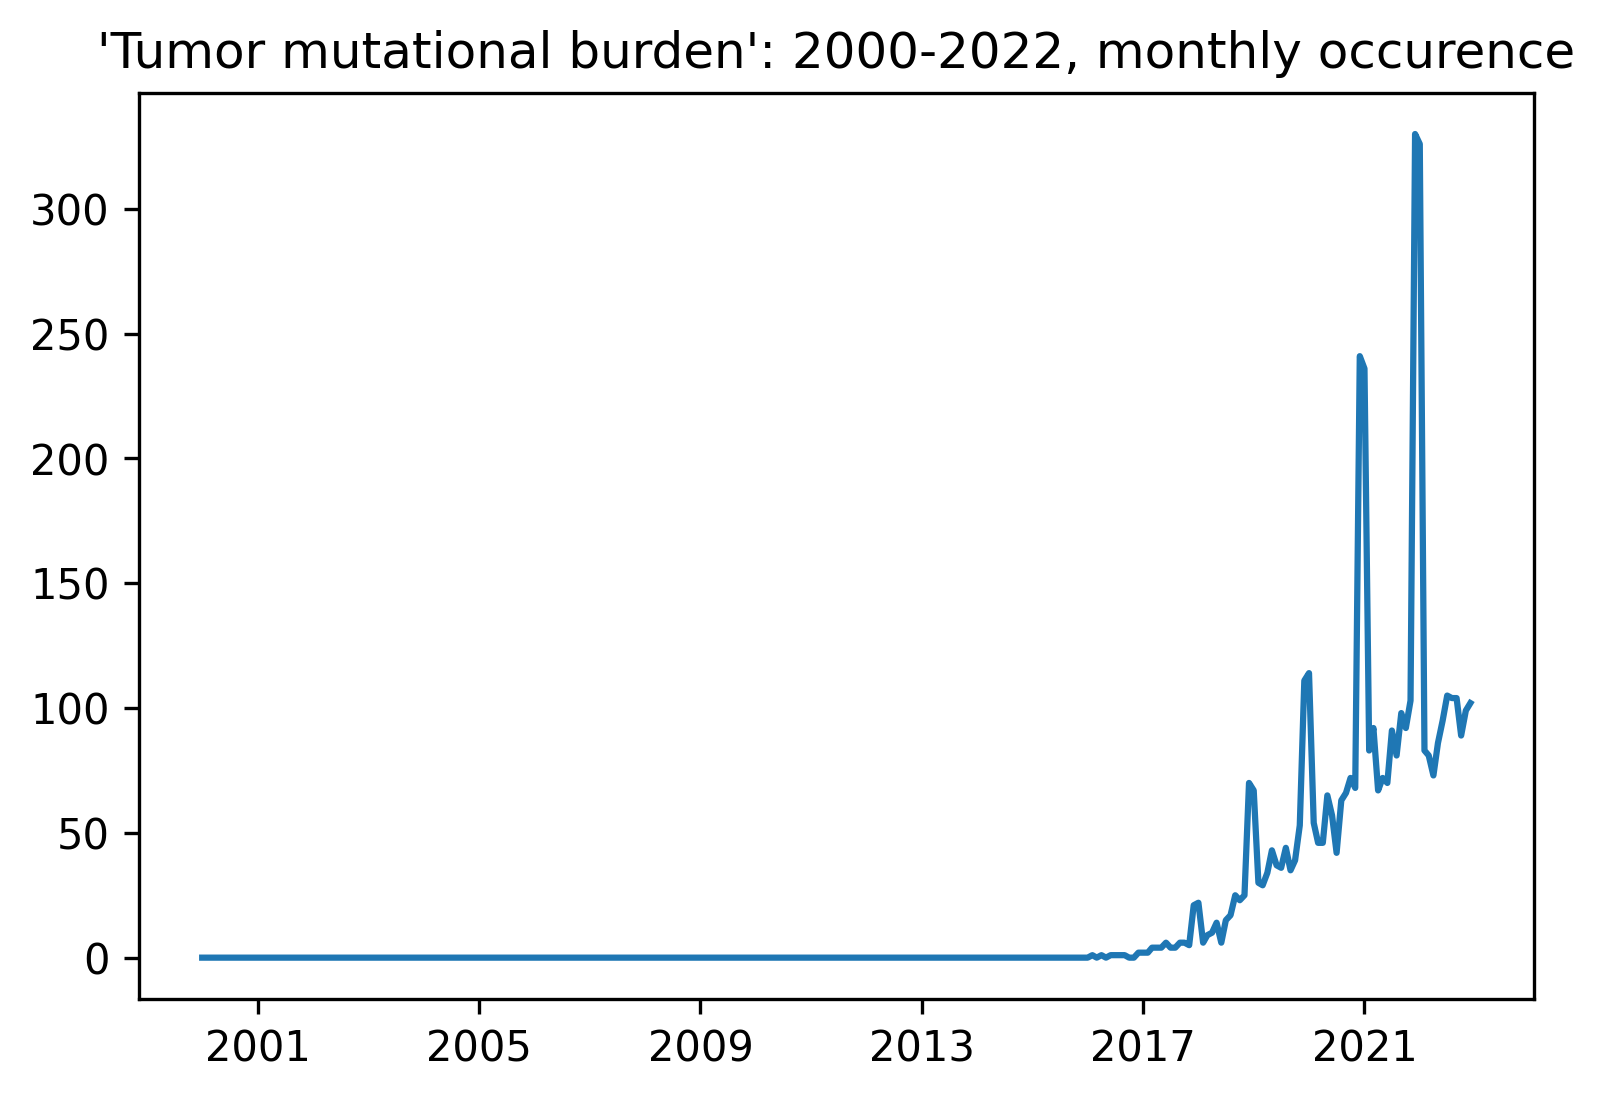

In [7]:
years = record['Start']
years = datestr2num([
    datetime.strptime(year, '%Y/%m/%d').strftime('%m/%d/%Y')
    for year in years
])
fig, ax= plt.subplots(figsize=(6,4),facecolor='white', dpi=300)
ax.plot(years,record['Count'])

ax.xaxis_date()
ax.xaxis.set_major_locator(
    AutoDateLocator(minticks = 3, interval_multiples = False))
ax.set_title("'Tumor mutational burden': 2000-2022, monthly occurence")
plt.show()

#### checking

In [8]:
# confirming that the function returns same result as Pubmed webpage --> yes

search('"tumor mutational burden"', '2022/01/01', '2022/12/31')

759

In [14]:
# playing around with date formats
start_date = datetime(2022, 5, 1, 0, 0, 0)
end_date = start_date + relativedelta(months=+1)

start_date, end_date = start_date.strftime('%Y/%m/%d'), end_date.strftime('%Y/%m/%d')
#start_date, end_date = datetime.strptime(start_date, '%Y/%m/%d').date(), datetime.strptime(end_date, '%Y/%m/%d').date()
print(start_date, end_date)
#search('"tumor mutational burden"', start_date, end_date)

2022/05/01 2022/06/01


#### Cancer research over time

In [11]:
# define function that will search for a phrase and return counts of term occurences within specified time (mindate-maxdate)
def search(query1,query2, start_date, end_date):
    Entrez.email = "" # insert with your own email address for NCBI contact
    handle1 = Entrez.esearch(db='pubmed',
                            sort='relevance',
                            retmode='xml',
                            mindate = start_date, 
                            maxdate = end_date,
                            datetype = "pdat",
                            term=query1)
    records1 = Entrez.read(handle1)
    count1 = int(records1["Count"])
    
    handle2 = Entrez.esearch(db='pubmed',
                            sort='relevance',
                            retmode='xml',
                            mindate = start_date, 
                            maxdate = end_date,
                            datetype = "pdat",
                            term=query2)
    records2 = Entrez.read(handle2)
    count2 = int(records2["Count"])
    return count1, count2

# period of interest. For example, year 2017
start_date = datetime(2017, 1, 1)
terminate_date = datetime(2017, 12, 31)

# search for the term per months within until period of interest is over
# entrez esearch function accepts dates in string format; but we need datetime format to iterate,
# therefore we switch between date formats

while start_date <= terminate_date:
    
    end_date = start_date + relativedelta(months=+1)
    start_date, end_date = start_date.strftime('%Y/%m/%d'), end_date.strftime('%Y/%m/%d')
    
    x = search('"tumor mutational burden"', 'cancer', start_date, end_date)
    print(start_date, end_date, "The phrase 'TMB' and 'cancer' occured", x, "times respectively") 
    
    start_date, end_date = datetime.strptime(start_date, '%Y/%m/%d').date(), datetime.strptime(end_date, '%Y/%m/%d').date()
    start_date = end_date +relativedelta(hour=0, second=0)

2017/01/01 2017/02/01 The phrase 'TMB' and 'cancer' occured (2, 47771) times respectively
2017/02/01 2017/03/01 The phrase 'TMB' and 'cancer' occured (2, 29364) times respectively
2017/03/01 2017/04/01 The phrase 'TMB' and 'cancer' occured (4, 31001) times respectively
2017/04/01 2017/05/01 The phrase 'TMB' and 'cancer' occured (4, 29208) times respectively
2017/05/01 2017/06/01 The phrase 'TMB' and 'cancer' occured (4, 31173) times respectively
2017/06/01 2017/07/01 The phrase 'TMB' and 'cancer' occured (6, 31246) times respectively
2017/07/01 2017/08/01 The phrase 'TMB' and 'cancer' occured (4, 31203) times respectively
2017/08/01 2017/09/01 The phrase 'TMB' and 'cancer' occured (4, 31761) times respectively
2017/09/01 2017/10/01 The phrase 'TMB' and 'cancer' occured (6, 32165) times respectively
2017/10/01 2017/11/01 The phrase 'TMB' and 'cancer' occured (6, 31919) times respectively
2017/11/01 2017/12/01 The phrase 'TMB' and 'cancer' occured (5, 33075) times respectively
2017/12/01

In [15]:
handle = Entrez.egquery(term='"tumor mutational burden"', mindate = "2022/05/01", maxdate = "2022/06/01")
record = Entrez.read(handle)
for row in record["eGQueryResult"]:
    if row["DbName"] == "pubmed":
        print(row["Count"])

2056
